Accuracy: 0.9543147208121827
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       188
           1       0.00      0.00      0.00         9

    accuracy                           0.95       197
   macro avg       0.48      0.50      0.49       197
weighted avg       0.91      0.95      0.93       197

Best parameters: {'logisticregression__C': 0.01}
Accuracy: 0.9543147208121827
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       188
           1       0.00      0.00      0.00         9

    accuracy                           0.95       197
   macro avg       0.48      0.50      0.49       197
weighted avg       0.91      0.95      0.93       197



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

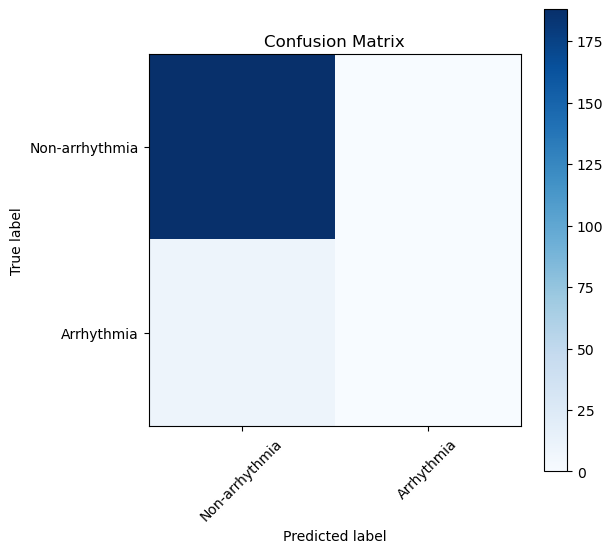

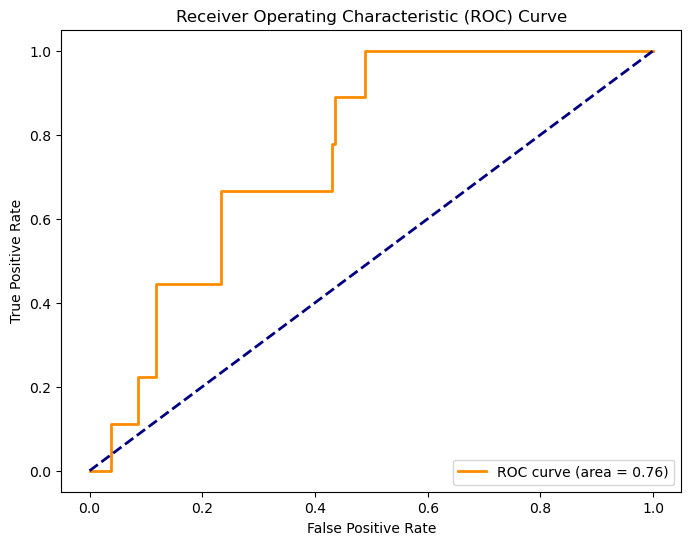

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc

data = pd.read_csv('downloads/dataset_caseid.csv')  # CSV 파일 경로 입력

X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='lbfgs'))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 파라미터 설정
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0]
}

# GridSearchCV 설정 (교차 검증)
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적 모델로 예측
y_pred = grid_search.best_estimator_.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = ['Non-arrhythmia', 'Arrhythmia']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, grid_search.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
